In [1]:
import numpy as np
import keras
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten,Conv2D

In [2]:
#Split dataset into training and testing sets
#load_data() automatically splits dataset into training and testing
from tensorflow.keras.datasets import mnist

#For Visualization
import matplotlib.pyplot as plt


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape #60,000 training examples

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

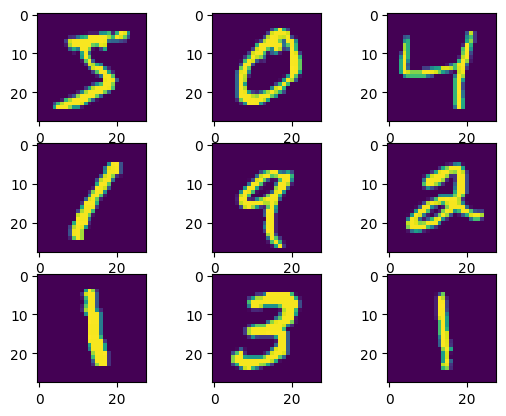

In [7]:
#Displaying some numbers
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i])
plt.show()

### Build model

In [8]:
#[When a feature is present only that bit is set to 1 rest all 0] ---> One hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [9]:
y_train[:5]
#First line in y_train represents 5 as '1' is present in position 5

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
#Do same for test data
y_test = to_categorical(y_test)

In [11]:
#Defining model for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense, Flatten,MaxPooling2D
from tensorflow.keras.optimizers import SGD
def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer="he_uniform",input_shape=(28,28,1)))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer="he_uniform"))
    model.add(Dense(10,activation='softmax'))
    opt = SGD(momentum=0.9)
    model.compile(optimizer=opt,loss='CategoricalCrossentropy',metrics=['accuracy'])
    return model

In [12]:
x_train.shape[0],28,28,1

(60000, 28, 28, 1)

In [13]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))

In [14]:
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [15]:
#For normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
model = define_model()

In [17]:
H = model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1568 - accuracy: 0.9531
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0553 - accuracy: 0.9825
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0361 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0246 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0182 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0132 - accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0094 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0065 - accuracy: 0.9983
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0047 - accuracy: 0.9990
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/s

In [18]:
y_output = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


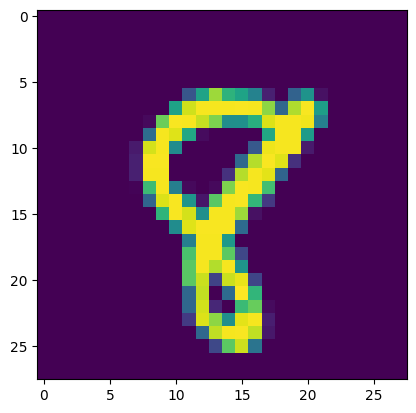

In [19]:
import random
index = random.randint(1,10000)
plt.imshow(x_test[index])

In [20]:
pred_num = max(y_output[index])
for i in range(len(y_output[index])):
    if(y_output[index][i] == pred_num):
        print("Predicted number is: ",i)
        break

Predicted number is:  8


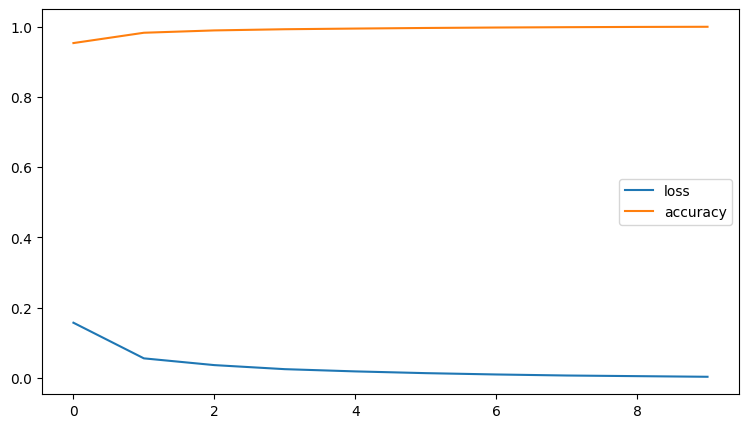

In [21]:
import pandas as pd
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.show()